## Repeated Sampling

Now you will simulate the following scenario: 

You are a researcher at  AgraBiz Corporation, which has a population of 100,000 acres of corn. We want to estimate the average yield of bushels per acre for the last year. Doing a survey of the complete population would be too time consuming, so we're going to randomly select 30 acres, record their yields, and calculate the mean of the sample. 

We will simulate this by creating the population data using the `random` library, and we will repeatedly simulate sampling 30 acres and compare the different samples to see what they can tell us about the population.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

Next we will randomly generate our __population__ data. Just like in reality, we will not know the true parameters of our population at the outset.

The population data will be a DataFrame containing acre parcel IDs from 1 to 10000, and yield in bushels.

In [2]:
np.random.seed(1234)
acres = pd.DataFrame(list(zip(range(1,100001), np.int_(np.round(np.random.chisquare(df=13, size=100000) * 10)))), columns=['id','yield'])
acres.head()

,id,yield
0,1,148
1,2,73
2,3,91
3,4,173
4,5,124


In [3]:
acres.tail()

,id,yield
99995,99996,100
99996,99997,98
99997,99998,133
99998,99999,119
99999,100000,130


### Single Sample
Select a random sample of 30 acres, print their yields, and calculate the sample mean. (No random seed necessary here)

In [4]:
sample = acres.sample(30)
sample

,id,yield
75135,75136,109
73562,73563,117
4446,4447,42
18324,18325,100
25671,25672,109
24250,24251,172
14228,14229,180
85992,85993,151
11497,11498,70
99683,99684,145


In [5]:
print(f"Mean of the 30 acre yields: {acres['yield'].mean():.2f}")

Mean of the 30 acre yields: 129.99


In the real world, if you had collected this sample and calculated the statistic, how would you explain what it tells us about the sample, and about the population?

#### Answer:
These 30 acres had an average yield of 129.99 bushels. If we had to estimate the population mean, we would use this 129.99 bushels as our estimate of the population mean.

=========

### 10 Repeated Samples
Now generate 10 samples of size 30 using a for loop. Print the 10 sample means.

In [6]:
sample_means = []

for _ in range(10):
    temp_sample = acres.sample(30)
    sample_means.append(temp_sample['yield'].mean())
    
print("Sample Means:")
print(sample_means)

Sample Means:
[123.5, 114.5, 119.3, 134.46666666666667, 130.73333333333332, 121.16666666666667, 131.3, 116.63333333333334, 138.03333333333333, 151.26666666666668]


Draw a histogram of the 10 sample means, with a vertical line at the mean (of the 10 sample means).

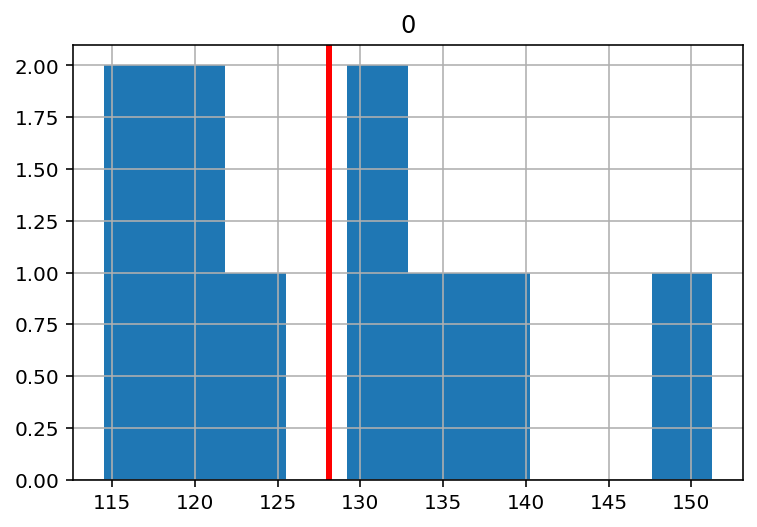

In [7]:
sample_means_df = pd.DataFrame(sample_means)
sample_means_df.hist()
plt.axvline(sample_means_df[0].mean(), color='r', linewidth=3)
plt.show()

### 100 Repeated Samples
Take 100 samples and record their sample means (you don't have to print them). Draw a histogram that includes a vertical line for the overall mean.

_Optional:_ Use a list comprehension instead of a for loop this time.

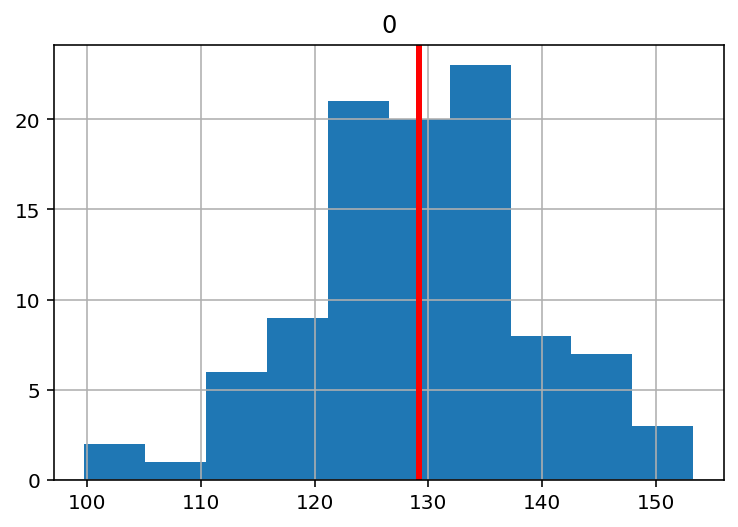

In [8]:
sample_means_100_df = pd.DataFrame([acres.sample(30)['yield'].mean() for _ in range(100)])
sample_means_100_df.hist()
plt.axvline(sample_means_100_df[0].mean(), color='r', linewidth=3)
plt.show()

### 10,000 Repeated Samples
Take 10,000 samples and record their sample means (don't have to print them). Draw a histogram that includes a vertical line for the overall mean.

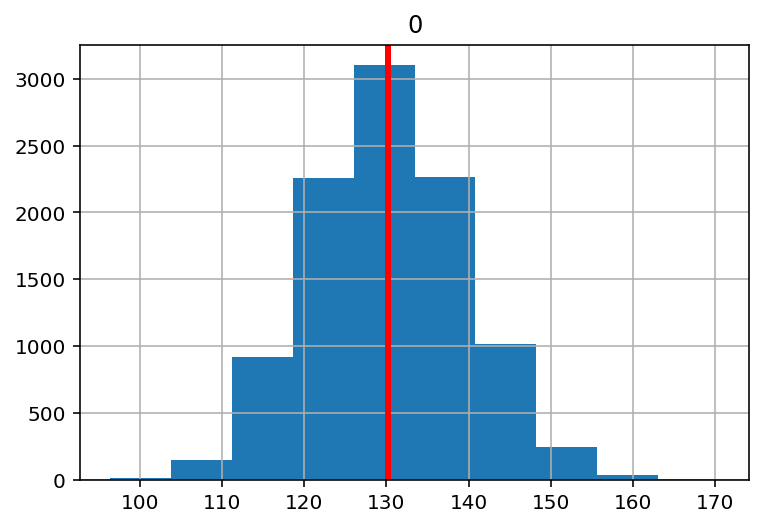

In [9]:
sample_means_10k_df = pd.DataFrame([acres.sample(30)['yield'].mean() for _ in range(10000)])
sample_means_10k_df.hist()
plt.axvline(sample_means_10k_df[0].mean(), color='r', linewidth=3)
plt.show()

### Conclusion
If you compare the distributions of sample means that we generated for 10 samples, 100 samples, and 10,000 samples, how would you describe what you see?

#### Answer:
As the number of samples taken increases, the distribution of their sample means becomes more Normal-shaped, and we assume that their overall mean gets closer to the true population mean. In this case, we believe the true population mean of corn grown per acre is very close to 130 bushels per acre.

### Optional:
What do you know about the shape of the population distribution?

#### Answer:
We don't know the shape of the population distribution. We only know that the shape of the sampling distribution is Normal.